In [84]:
import baseline
import importlib
importlib.reload(baseline)
from baseline import *
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
#from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
data = loader('full_data.csv')
data = reduce_mem_usage(data)

Mem. usage decreased to 685.24 Mb (76.8% reduction)


LinearRegression

LinearRegression
RMSE for split 1: 0.749
RMSE for split 2: 0.707
RMSE for split 3: 0.676
Mean RMSE for all splits: 0.711


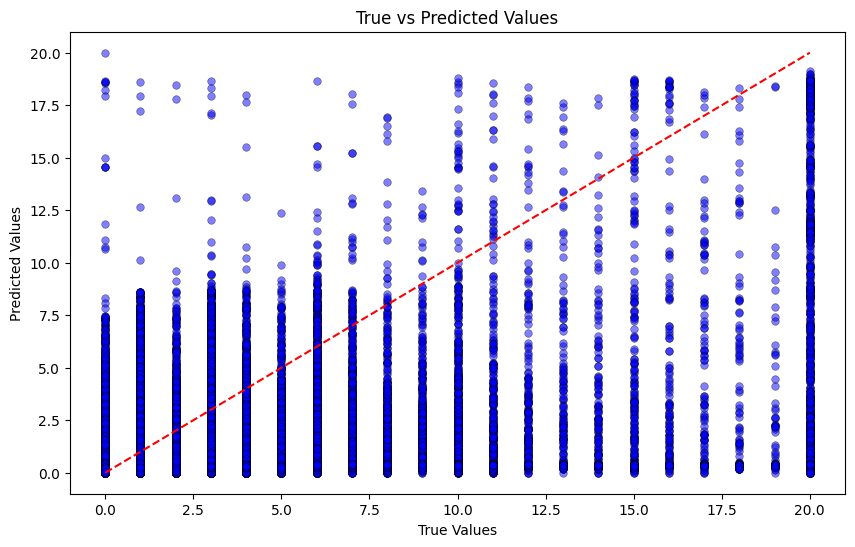

In [60]:
tss_cv(df = data, n_splits = 3, model = LinearRegression(), true_pred_plot=True)

In [61]:
X_train, y_train, X_val, y_val, X_test = data_split(df = data)

In [71]:
y_pred = train_predict(X_train = np.append(X_train, X_val, axis = 0), y_train = np.append(y_train, y_val, axis = 0), 
              X_test = X_test, model_ = LinearRegression())
submission(y_pred)

c:\Users\User\OneDrive\Рабочий стол\Trainee\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


'Submission file created'

Linear Regression. Submission score: 1.07154

XGBRegressor

XGBRegressor
RMSE for split 1: 0.723
RMSE for split 2: 0.685
RMSE for split 3: 0.687
Mean RMSE for all splits: 0.698


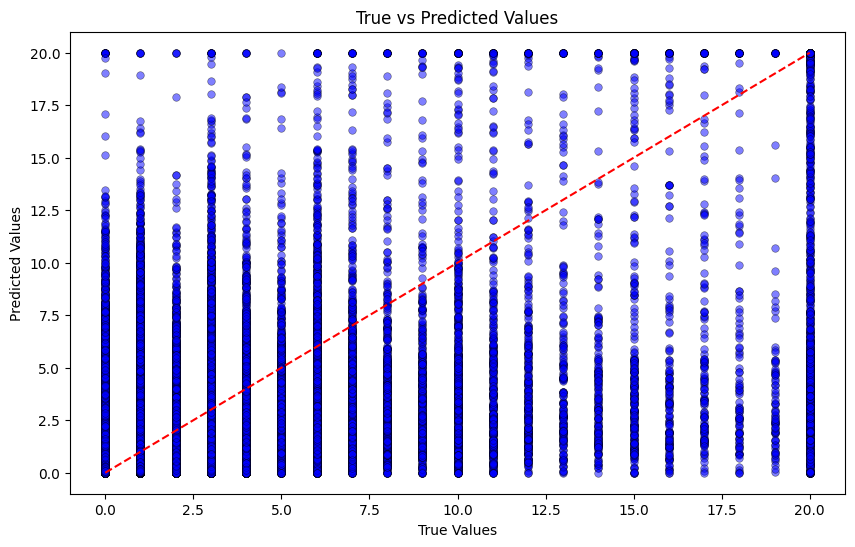

In [ ]:
tss_cv(df = data, n_splits = 3, model = XGBRegressor(), true_pred_plot=True)

In [80]:
y_pred = train_predict(X_train = X_train, y_train = y_train, X_val = X_val,
                       y_val = y_val, X_test = X_test, model_ = XGBRegressor(), model_params = {'early_stopping_rounds': 20})
submission(y_pred)

'Submission file created'

XGBRegression. Submission score: 1.01083

Higher submission score for Linear Regression means, that our data have data leakage.

LightGBM

LGBMRegressor
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.124126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3844
[LightGBM] [Info] Number of data points in the train set: 2709997, number of used features: 33
[LightGBM] [Info] Start training from score 0.205220
RMSE for split 1: 0.712
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.543417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4415
[LightGBM] [Info] Number of data points in the train set: 5419992, number of used features: 34
[LightGBM] [Info] Start training from score 0.211200
RMSE for split 2: 0.666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.274321 seconds.
You can set `force

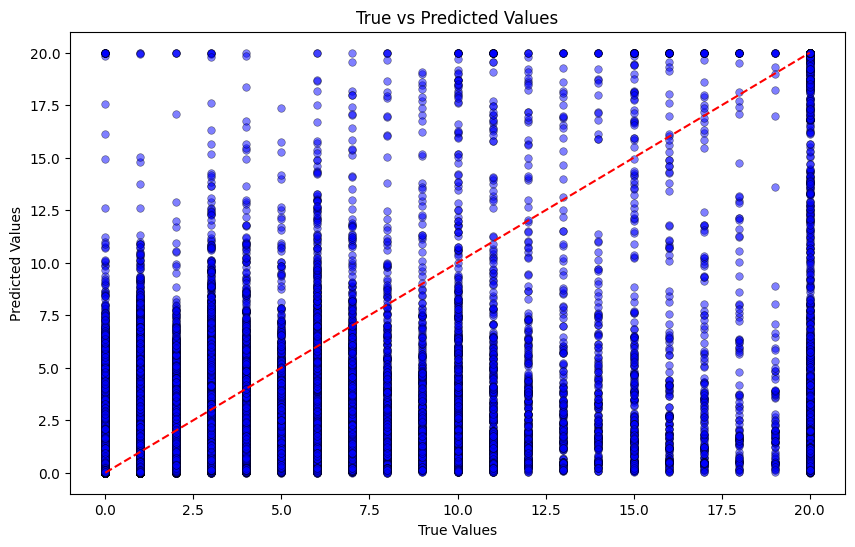

In [82]:
tss_cv(df = data, n_splits = 3, model = LGBMRegressor(verbose = 0), true_pred_plot=True)

In [86]:
y_pred = train_predict(X_train = X_train, y_train = y_train, X_val = X_val,
                       y_val = y_val, X_test = X_test, model_ = LGBMRegressor(verbose = 0))
submission(y_pred)

'Submission file created'

LightGBM. Submission score: 1.02110